<a href="https://colab.research.google.com/github/otaviodefilpo/churn-prediction-telecom/blob/main/Churn_Prediction_para_uma_empresa_de_Telecomunica%C3%A7%C3%B5es_Ot%C3%A1vio_de_Filpo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#### **Projeto Módulo 5 - Data Science na Prática 2.0** - *by [sigmoidal.ai](https://sigmoidal.ai)*  

---

# Churn Prediction

*Churn rate*, ou simplesmente *churn*, representa a taxa de evasão da sua base de clientes. Em serviços como Spotify ou Netflix, ela representaria a taxa de cancelamento de assinaturas.

<p align=center>
<img src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/churnrate.jpg" width="60%"></p>

Ela é de extrema importância para a administração e sua análise ao longo do tempo pode mostrar que existe algum problema que deve ser atacado.

*Churn* também pode ser usado para identificar potenciais cancelamentos, com um tempo de antecedência, e promover ações direcionadas para tentar reter tais clientes. Essa métrica deve receber atenção pelo fato de que o Custo de Aquisição de Cliente (CAC) é normalmente mais alto que o custo para mantê-los. Ou seja, um alto valor para o *churn rate* é o que não desejamos.

## Aquisição dos Dados

Os dados utilizados neste projeto foram originalmente disponibilizados na [plataforma de ensino da IBM Developer](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#), e tratam de um problema típico de uma companhia de telecomunicações. O *dataset* completo pode ser encontrado [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv).

Apesar de não haver informações explícitas disponíves, os nomes das colunas permitem um entendimento a respeito do problema.

In [ ]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# importar os dados
DATA_PATH = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(DATA_PATH)

# Criando um backup
churn = df.copy()

# Observando o shape do banco de dados
print("O dataset possui {} Entradas e {} Variáveis".format(churn.shape[0],churn.shape[1]))

O dataset possui 7043 Entradas e 21 Variáveis


# **Análise Exploratória dos Dados**
Vamos visualizar informações básicas, como as primeiras entradas, valores ausentes e tipos de dados.

In [ ]:
# Visualizando as 5 primeiras entradas do Dataset
churn.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Porcentagem de valores ausentes
(churn.isnull().sum()/churn.shape[0])

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [ ]:
# O tipos de dados das nossas colunas
churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Aparentemente os dados não possuem valores ausentes, então corrigeremos apenas o tipo de dado de `TotalCharges`.

In [ ]:
# Transformando TotalCharges para valores númericos
churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'], errors='coerce')

# Investigando os valores de TotalCharges após a transformação
print("A porcentagem de valores nulos na variável convertida é de {:.4f}%".format(churn['TotalCharges'].isnull().sum()/churn.shape[0]))

A porcentagem de valores nulos na variável convertida é de 0.0016%


Como os valores ausentes são de 0.0016%, vamos apenas removê-los do Dataset.

In [ ]:
# Utilizando o metodo dropna
churn.dropna(axis=0,subset=['TotalCharges'],inplace=True)

Percebemos no dataset que dentre as variáveis categóricas, as variáveis `gender`, `SeniorCitizen`, `Partner`, `Dependents`,`PhoneService`, `PaperlessBilling` e `Churn` (Que é a nossa variável alvo) são binárias, logo podem ser transformadas para 0 e 1 durante nosso processamento de dados.

Vamos observar quantas categorias diferentes as nossas variáveis categórias restantes possuem.

In [ ]:
# Criando lista de categorias não binárias
n_bin = ['gender','InternetService','MultipleLines','OnlineSecurity', 'OnlineBackup','DeviceProtection','TechSupport',
         'StreamingTV','StreamingMovies','Contract','PaymentMethod']

for i in n_bin:
  print('\nQuantidade de Cada categoria em {}'.format(i))
  print(churn[i].value_counts())


Quantidade de Cada categoria em gender
Male      3549
Female    3483
Name: gender, dtype: int64

Quantidade de Cada categoria em InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

Quantidade de Cada categoria em MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

Quantidade de Cada categoria em OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

Quantidade de Cada categoria em OnlineBackup
No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64

Quantidade de Cada categoria em DeviceProtection
No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64

Quantidade de Cada categoria em TechSupport
No                     3472
Yes                    2040


Para finalizar a EDA, vamos observar o balanceamento da nossa variável alvo, que é `Churn`.


Os valores positivos de Churn representam 26.6% do Dataset



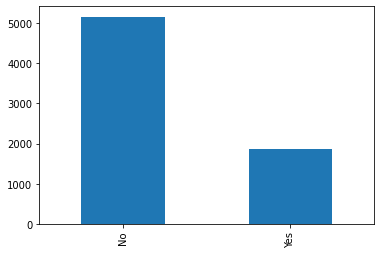

In [ ]:
# Plotando o gráfico de barras
churn.Churn.value_counts().plot(kind='bar')

# Observando a porcentagem de valores positivos
aux1 = (churn[churn['Churn'] == 'Yes'].shape[0] / churn.shape[0])
print('\nOs valores positivos de Churn representam {:.1f}% do Dataset\n'.format(aux1 *100))

# **Processamento dos Dados**
Primeiramente vamos processar as variáveis categóricas, dividindo-as de duas formas, as que são binárias e as que possuem mais de duas categorias, com exceção de `Gender` que aplicaremos uma lógica diferente.

In [ ]:
# Primeiramente vamos criar um backup do dataset, já removendo a coluna de ID que não será utilizada por nós
churn_clean = churn.drop(columns='customerID')

Nas variáveis binárias aplicaremos o método LabelEnconder

In [ ]:
# Criando uma lista auxiliar com as variáveis binárias
var_bin = ['SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'PaperlessBilling','Churn']

# Importando o comando necessário
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Aplicando o LabelEnconder
for v in var_bin:
  le.fit(churn_clean[v])
  churn_clean[v] = le.transform(churn_clean[v])

Abaixo podemos observar que nossas variáveis binárias agora estão com valores de 0 ou 1

In [ ]:
# Observando o dataset
churn_clean.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


Agora para as variáveis que possuem mais de uma categoria, utilizaremos o comando do próprio pandas, chamado Get Dummies, que transforma cada categoria numa variável binária. Utilizaremos a lista de variáveis não binárias que criamos anteriormente.

In [ ]:
# Relembrando a lista de variáveis não binárias
n_bin

# Aplicando o processo
churn_clean = pd.get_dummies(churn_clean,columns=n_bin)

# Observando nosso dataset atualizado
churn_clean.head(5)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,29.85,29.85,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,56.95,1889.50,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,1,1,53.85,108.15,1,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,0,0,42.30,1840.75,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2,1,1,70.70,151.65,1,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


Podemos observar acima que algumas variáveis criadas podem ser consideradas repetidas, pois a categoria de algumas apenas dizia se tinham internet instalada ou não, então dessas, vamo manter apenas a `InternetService_No` e excluir as demais semelhantes

In [ ]:
churn_clean = churn_clean.drop(columns=['OnlineSecurity_No internet service','OnlineBackup_No internet service',
                                       'DeviceProtection_No internet service','TechSupport_No internet service',
                                        'StreamingTV_No internet service','StreamingMovies_No internet service',
                                        'MultipleLines_No phone service'])

Agora vamos observar como nossos dados modificados estão, utilizando o método `info()`.

In [ ]:
# Método Info
churn_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 35 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   Partner                                  7032 non-null   int64  
 2   Dependents                               7032 non-null   int64  
 3   tenure                                   7032 non-null   int64  
 4   PhoneService                             7032 non-null   int64  
 5   PaperlessBilling                         7032 non-null   int64  
 6   MonthlyCharges                           7032 non-null   float64
 7   TotalCharges                             7032 non-null   float64
 8   Churn                                    7032 non-null   int64  
 9   gender_Female                            7032 non-null   uint8  
 10  gender_Male                              7032 no

Agora para uma última olhada nas informações estatítiscas de nossos dados, utilizaremos o método `describe()`

In [ ]:
# Método Describe
churn_clean.describe()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,0.482509,0.298493,32.421786,0.903299,0.592719,64.798208,2283.300441,0.265785,0.495307,0.504693,0.343572,0.440273,0.216155,0.481371,0.421928,0.497298,0.286547,0.438993,0.344852,0.439989,0.343857,0.493743,0.290102,0.399460,0.384386,0.395478,0.388367,0.551052,0.209329,0.239619,0.219283,0.216297,0.336320,0.228100
std,0.368844,0.499729,0.457629,24.545260,0.295571,0.491363,30.085974,2266.771362,0.441782,0.500014,0.500014,0.474934,0.496455,0.411650,0.499688,0.493902,0.500028,0.452180,0.496300,0.475354,0.496421,0.475028,0.499996,0.453842,0.489822,0.486484,0.488988,0.487414,0.497422,0.406858,0.426881,0.413790,0.411748,0.472483,0.419637
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.587500,401.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.862500,3794.737500,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Observando as informações estatísticas, não há nenhum dado discrepante nas nossas variáveis, então já podemos partir para a construção do Modelo.

# **Machine Learning**
Como a variável alvo é binária, vamos utilizar métodos de classificação no nosso modelo.

In [ ]:
# Importando os pacotes necessários
!pip install scikit-plot -q
import scikitplot as skplt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

from imblearn.under_sampling import RandomUnderSampler

Agora definindo X e y, já os dividindo em Treino e Teste.

In [ ]:
# Definindo os X e y
X = churn_clean.drop('Churn', axis=1)
y = churn_clean['Churn']

np.random.seed(42)

# aplicando train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

Agora partiremos para o passo de padronização e balanceamento dos dados de Churn, que já havíamos notado na nossa EDA. Lembrando sempre que todos os passos devem ser feitos nos dados de treino para não enviezarmos nosso modelo.

In [ ]:
# Padronizando os dados
std = StandardScaler().fit(X_train)
X_train = std.transform(X_train)

# Balanceando os dados
rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_sample(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Agora utilizaremos o método de Ensemble para produzir alguns modelos de Classificação e juntar seus resultados.
Os modelos escolhidos foram:

* Stochastic Gradient Descendent
* Decision Tree
* SVC
* Regressão Logística


In [ ]:
# Importando os modelos escolhidos.
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Instanciando os modelos
sgdc = SGDClassifier()
dt = DecisionTreeClassifier()
svc = SVC()
lr = LogisticRegression()

Vamos aplicar os modelos algumas vezes para podermos melhor o processo.

In [ ]:
# Aplicando os modelos
X_test = std.transform(X_test)

np.random.seed(42)
predict = pd.DataFrame(y_test)
for model in (sgdc,dt,svc,lr):
  model.fit(X_train_rus,y_train_rus)
  y_pred = model.predict(X_test)
  predict[model.__class__.__name__] = y_pred

In [ ]:
# Observando as predições dos modelos
predict

,Churn,SGDClassifier,DecisionTreeClassifier,SVC,LogisticRegression
2481,0,0,0,0,0
6784,0,0,0,0,0
6125,1,1,1,1,1
3052,0,0,0,0,0
4099,0,0,0,0,1
...,...,...,...,...,...
2763,0,0,1,0,0
6747,0,0,0,0,0
1700,0,0,0,0,0
1099,0,1,0,0,1


Agora aplicando o método de Ensemble

In [ ]:
# Importando bibliotecas necessárias
from sklearn.ensemble import VotingClassifier

# Instanciando o modelo
voting_clf = VotingClassifier(estimators=[('sgdc',sgdc),('dt',dt),('svc',svc),('lr',lr)])

In [ ]:
# Aplicando o método de ensemble
predict_en = pd.DataFrame(y_test)
for model in (sgdc,dt,svc,lr, voting_clf):
  model.fit(X_train_rus,y_train_rus)
  y_pred2 = model.predict(X_test)
  predict_en[model.__class__.__name__]= y_pred2

In [ ]:
# Observando o resultado do Voting Classifier
predict_en

,Churn,SGDClassifier,DecisionTreeClassifier,SVC,LogisticRegression,VotingClassifier
2481,0,0,0,0,0,0
6784,0,1,0,0,0,0
6125,1,1,1,1,1,1
3052,0,0,0,0,0,0
4099,0,0,0,0,1,0
...,...,...,...,...,...,...
2763,0,0,0,0,0,0
6747,0,0,0,0,0,0
1700,0,0,0,0,0,0
1099,0,0,0,0,1,0


Agora obtendo os valores de avaliação do modelo, do que fizemos até agora.

In [ ]:
# Importando as bibliotecas necessárias
from sklearn.metrics import precision_score,recall_score, accuracy_score
np.random.seed(42)

model = []
recall = []
precision = []
accuracy = []

for clf in (sgdc,dt,svc,lr, voting_clf):
  clf.fit(X_train_rus,y_train_rus)
  y_pred3 = clf.predict(X_test)
  model.append(clf.__class__.__name__)
  recall.append(recall_score(y_test, y_pred3))
  precision.append(precision_score(y_test, y_pred3))
  accuracy.append(accuracy_score(y_test, y_pred3))

rec = pd.DataFrame(data=recall,index=model,columns=['Recall'])
prec = pd.DataFrame(data=precision,index=model,columns=['Precision'])
acc = pd.DataFrame(data=accuracy,index=model,columns=['Accuracy'])

In [ ]:
# Unindo os valores de avaliação
val_aval = pd.concat([rec, prec, acc], axis=1)

# Mostrando os valores obtidos
val_aval

,Recall,Precision,Accuracy
SGDClassifier,0.684492,0.462094,0.704265
DecisionTreeClassifier,0.707665,0.448081,0.690521
SVC,0.793226,0.492802,0.727962
LogisticRegression,0.802139,0.505051,0.738389
VotingClassifier,0.736185,0.509877,0.741706


Agora vamos visualizar a matriz de confusão para observar se os resultados totais estão satisfatórios.

In [ ]:
# Importando bibliotecas necessárias
from scikitplot.metrics import plot_confusion_matrix

# Isolando a variável prevista no Assemble
y_preden = predict_en['VotingClassifier']

              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1549
           1       0.54      0.71      0.61       561

    accuracy                           0.76      2110
   macro avg       0.71      0.75      0.72      2110
weighted avg       0.79      0.76      0.77      2110

AUC: 0.7460



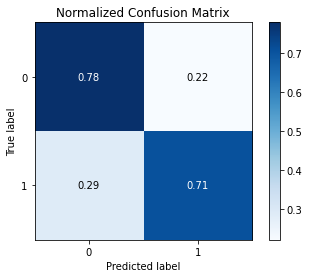

In [ ]:
# Classification Report
print(classification_report(y_test, y_preden))

# imprimir a área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_preden)))

# plotar matriz de confusão
plot_confusion_matrix(y_test, y_preden, normalize=True)
plt.show()

# **Conclusão**

O modelo não ficou satisfatório o suficiente, pois olhando as características do negócio, uma métrica importante para o nosso modelo de Churn prediction seria o Recall, pois como o objetivo é diminuirmos o número de clientes que saíriam do nosso serviço, é importante que nosso modelo tenha um ótimo desempenho de Verdadeiros Positivos, mesmo que signifique diminuir os FP, FN e VN.

Nesse caso, modelos mais robustos e refinados são o recomendados nesse caso, logo é o que buscaremos como andamento desse projeto.